# Derivadas

> $$\frac{dY}{dt} = V_Y$$
>
> $$\frac{d{V_Y}}{dt} = \frac{\frac{1}{2}\rho \ C_DAV_Y^2-mg}{m}$$

In [2]:
from scipy.integrate import odeint
from numpy import arange
import matplotlib.pyplot as plt
from math import pi

In [22]:
rho = 1.19799  # kg/m³
cd = 1.75
A = pi * (45e-2/2)**2  # m³
m = .5  # kg
g = 10  # m/s²

t0s = [11,0]
dt = 1e-2
tf = 10
tempo = arange(0,tf,dt)

In [20]:
def modelo(dts,t):
    y = dts[0]
    vy = dts[1]

    dydt = vy
    dvydt = (1/2 * rho * cd * A * vy**2 - m * g) / m
    if y < 0:
        dydt = 0
        dvydt = 0
    return [dydt,dvydt]

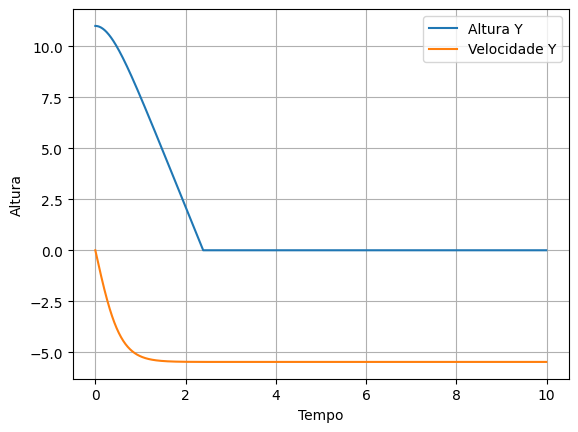

In [23]:
lista_y = odeint(modelo,t0s,tempo)
plt.plot(tempo,lista_y,label=('Altura Y','Velocidade Y'))
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Altura')
plt.legend()
plt.show()